Topic: Project 3      
Subject: Visualizing League of Legends Data  
Date: 10/25/2017   
Name: Zach Heick  

**Order of Events**  
  1. [Storing Raw League of Legends Data](https://github.com/ZachHeick/Project_McNulty/blob/master/Project_Notebooks/Project_McNulty_SQL_Alchemy.ipynb)  
  2. [Cleaning League of Legends Data](https://github.com/ZachHeick/Project_McNulty/blob/master/Project_Notebooks/Project_McNulty_Cleaning.ipynb)  
  3. [Creating Dataframes for EDA](https://github.com/ZachHeick/Project_McNulty/blob/master/Project_Notebooks/Project_McNulty_Creating_EDA_Dataframes.ipynb)  
  4. [Visualizing League of Legends Data](https://github.com/ZachHeick/Project_McNulty/blob/master/Project_Notebooks/Project_McNulty_EDA_Visuals.ipynb)  
  5. [Analyzing Classification Algorithms](https://github.com/ZachHeick/Project_McNulty/blob/master/Project_Notebooks/Project_McNulty_Modeling.ipynb)

**Summary**: The dataframes created from the previous notebook, `Project_McNulty_Creating_EDA_Dataframes`, are visualized in order to help understand the data a little better. Specifically, I was interested in seeing if there was a champion or champion role that was stronger than others. 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
games_df = pd.read_pickle('../Project_Data/EDA_df.pickle')
champ_df = pd.read_pickle('../Project_Data/champ_info.pickle')
picks_df = pd.read_pickle('../Project_Data/picks.pickle')
bans_df = pd.read_pickle('../Project_Data/bans.pickle')
picks_and_bans_df = pd.read_pickle('../Project_Data/picks_and_bans.pickle')

Looks like wins for blue and red side is close to even in this data set.

In [3]:
games_df['winner'].value_counts()

1    24322
2    23755
Name: winner, dtype: int64

Structure and objective correlations. I'm surprised to see that destroying the first tower has a slightly stronger correlation with winning than getting the first Baron, considering the team buff Baron gives is very strong while destroying towers does not give any. 

In [4]:
games_df.corr()['winner'].sort_values(ascending=False)

winner                  1.000000
red_towerKills          0.786187
firstInhibitor          0.535664
red_dragonKills         0.498813
red_baronKills          0.400402
firstTower              0.373998
firstDragon             0.309972
firstBaron              0.263135
red_riftHeraldKills     0.225411
firstBlood              0.173874
firstRiftHerald         0.119406
gameDuration            0.023703
blue_riftHeraldKills   -0.217919
blue_baronKills        -0.371640
blue_dragonKills       -0.474274
blue_towerKills        -0.772294
Name: winner, dtype: float64

## Picks and Bans by Role

In [5]:
picks_role_count_df = picks_df.groupby('Role').sum()
bans_role_count_df = bans_df.groupby('Role').sum()

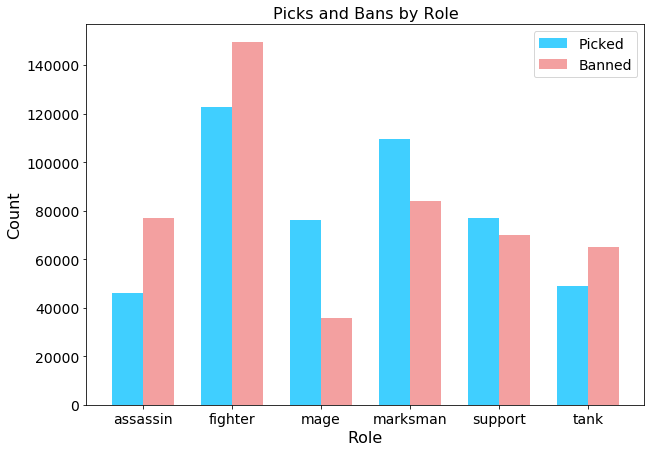

In [6]:
pos = list(range(len(picks_role_count_df['Picks']))) 
width = 0.35

fig, ax = plt.subplots(figsize=(10,7))

plt.bar(pos, 
        picks_role_count_df['Picks'], 
        width, 
        alpha=0.75, 
        color='deepskyblue', 
        label=picks_role_count_df.index[0])

plt.bar([p + width for p in pos], 
        bans_role_count_df['Bans'],
        width, 
        alpha=0.75, 
        color='lightcoral', 
        label=bans_role_count_df.index[1])

ax.set_xticks([p + width/2 for p in pos])
ax.set_xticklabels(picks_role_count_df.index, size=14)
plt.yticks(size=14)
ax.set_ylabel('Count', size=16)
ax.set_xlabel('Role', size=16)
ax.set_title('Picks and Bans by Role', size=16)

plt.legend(['Picked', 'Banned'], loc='upper right', prop={'size':14})
plt.show();

## Champion Win Rates by Role

In [7]:
supports = picks_df[picks_df['Role'] == 'support']
marksmen = picks_df[picks_df['Role'] == 'marksman']
tanks = picks_df[picks_df['Role'] == 'tank']
fighters = picks_df[picks_df['Role'] == 'fighter']
mages = picks_df[picks_df['Role'] == 'mage']

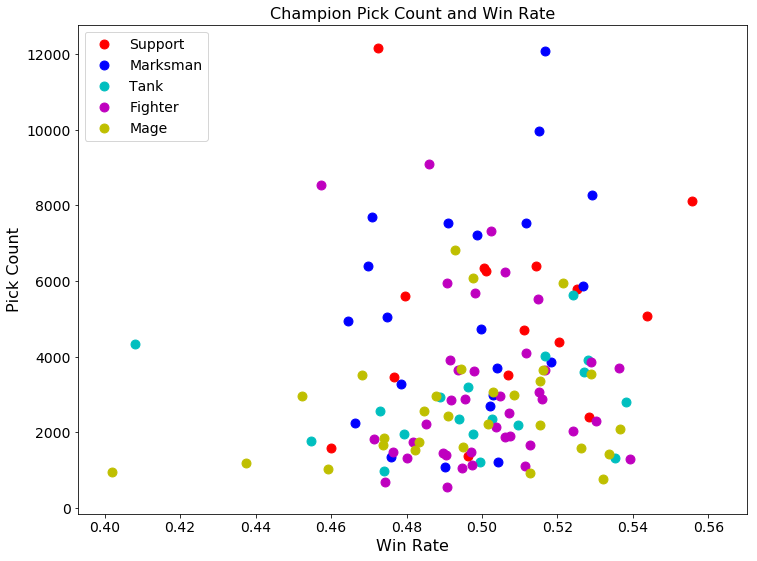

In [8]:
plt.figure(figsize=(12,9))

plt.scatter(supports['Win_rate'], supports['Picks'], color='r', label='Support', s=80)
plt.scatter(marksmen['Win_rate'], marksmen['Picks'], color='b', label='Marksman', s=80)
plt.scatter(tanks['Win_rate'], tanks['Picks'], color='c', label='Tank', s=80)
plt.scatter(fighters['Win_rate'], fighters['Picks'], color='m', label='Fighter', s=80)
plt.scatter(mages['Win_rate'], mages['Picks'], color='y', label='Mage', s=80)

plt.title('Champion Pick Count and Win Rate', size=16)
plt.xlabel('Win Rate', size=16)
plt.ylabel('Pick Count', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(loc='upper left', prop={'size':14});

## Picks and Bans By Champion

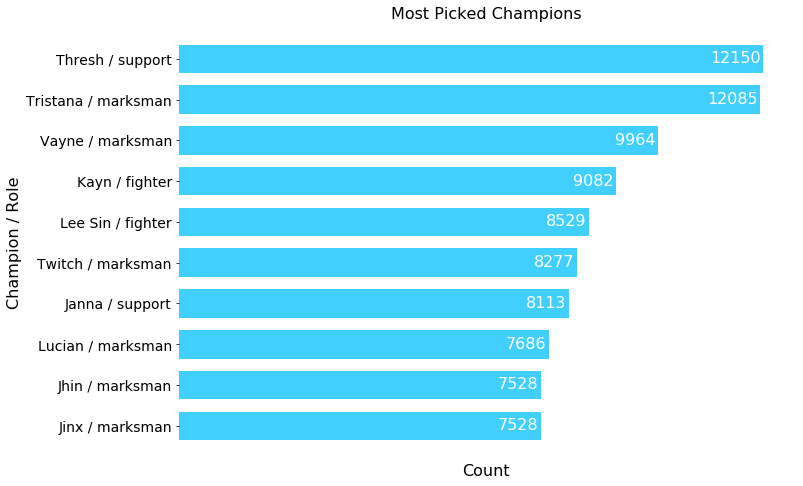

In [16]:
pos = list(range(len(picks_df[:10]['Picks']))) 
width = 0.7

fig, ax = plt.subplots(figsize=(11,8))

x = picks_df[:10]['Picks']

ax.barh(pos, 
        x, 
        width, 
        alpha=0.75, 
        color='deepskyblue', 
        label=picks_df.index[0])

ax.set_yticks([p for p in pos])
ax.set_yticklabels(picks_df.index + ' / ' + picks_df['Role'], size=14)
ax.set_xticklabels([0,2000,4000,6000,8000,10000,12000], size=14)

for i, v in enumerate(x):
    if v < 10000:
        ax.text(v - 900, i + .1, str(v), size=16, color='white')
    else:
        ax.text(v - 1100, i + .1, str(v), size=16, color='white')
        
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
ax.get_xaxis().set_ticks([])

ax.set_ylabel('Champion / Role', size=16)
ax.set_xlabel('Count', size=16)
ax.set_title('Most Picked Champions', size=16)
ax.invert_yaxis()

plt.show()

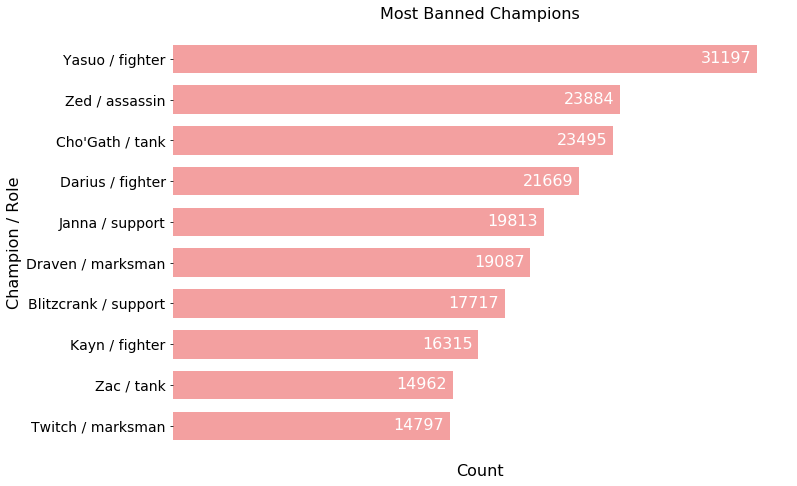

In [17]:
pos = list(range(len(bans_df[:10]['Bans']))) 
width = 0.7

fig, ax = plt.subplots(figsize=(11,8))

x = bans_df[:10]['Bans']

plt.barh(pos, 
        x, 
        width, 
        alpha=0.75, 
        color='lightcoral', 
        label=bans_df.index[0])

ax.set_yticks([p for p in pos])
ax.set_yticklabels(bans_df.index + ' / ' + bans_df['Role'], size=14)
ax.set_xticklabels([0,5000,10000,15000,20000,25000,30000], size=14)

for i, v in enumerate(x):
    ax.text(v - 3000, i + .1, str(v), size=16, color='white')
        
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
ax.get_xaxis().set_ticks([])

ax.set_ylabel('Champion / Role', size=16)
ax.set_xlabel('Count', size=16)
ax.set_title('Most Banned Champions', size=16)
ax.invert_yaxis()

plt.show()

In [11]:
picks_and_bans_df = picks_and_bans_df[:10]

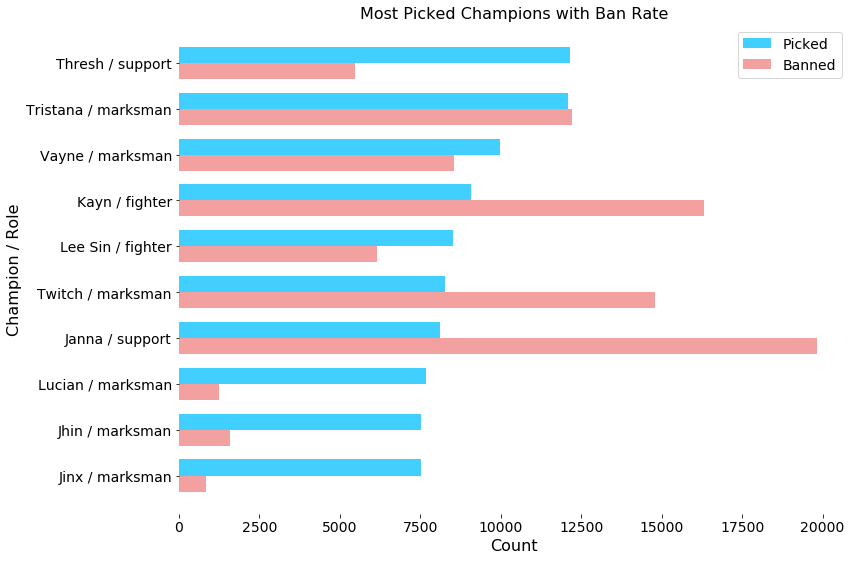

In [12]:
pos = list(range(len(picks_and_bans_df['Picks']))) 
width = 0.35

fig, ax = plt.subplots(figsize=(12,9))

plt.barh(pos, 
        picks_and_bans_df['Picks'], 
        width, 
        alpha=0.75, 
        color='deepskyblue', 
        label=picks_and_bans_df.index[0])

plt.barh([p + width for p in pos], 
        picks_and_bans_df['Bans'],
        width, 
        alpha=0.75, 
        color='lightcoral', 
        label=picks_and_bans_df.index[1])

ax.set_yticks([p + width/2 for p in pos])
ax.set_yticklabels(picks_and_bans_df.index + ' / ' + picks_and_bans_df['Role'], size=14)
ax.set_xticklabels([0,2500,5000,7500,10000,12500,15000,17500,20000], size=14)

ax.set_ylabel('Champion / Role', size=16)
ax.set_xlabel('Count', size=16)
ax.set_title('Most Picked Champions with Ban Rate', size=16)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.invert_yaxis()
    
plt.legend(['Picked', 'Banned'], loc='upper right', prop={'size':14})
plt.show();

## Summoner Spells

In [13]:
summ_spells = pd.concat(
    [games_df['blue_champ1_sum1'], games_df['blue_champ1_sum2'], games_df['blue_champ2_sum1'], games_df['blue_champ2_sum2'],
     games_df['blue_champ3_sum1'], games_df['blue_champ3_sum2'], games_df['blue_champ4_sum1'], games_df['blue_champ4_sum2'],
     games_df['blue_champ5_sum1'], games_df['blue_champ5_sum2'], games_df['red_champ1_sum1'], games_df['red_champ1_sum2'],
     games_df['red_champ2_sum1'], games_df['red_champ2_sum2'], games_df['red_champ3_sum1'], games_df['red_champ3_sum2'],
     games_df['red_champ4_sum1'], games_df['red_champ4_sum2'], games_df['red_champ5_sum1'], games_df['red_champ5_sum2']],
    ignore_index=True)

In [14]:
summ_spells_df = pd.DataFrame(summ_spells.value_counts())
summ_spells_df.rename(columns={0:'Count'}, inplace=True)
summ_spells_df.sort_index(inplace=True)

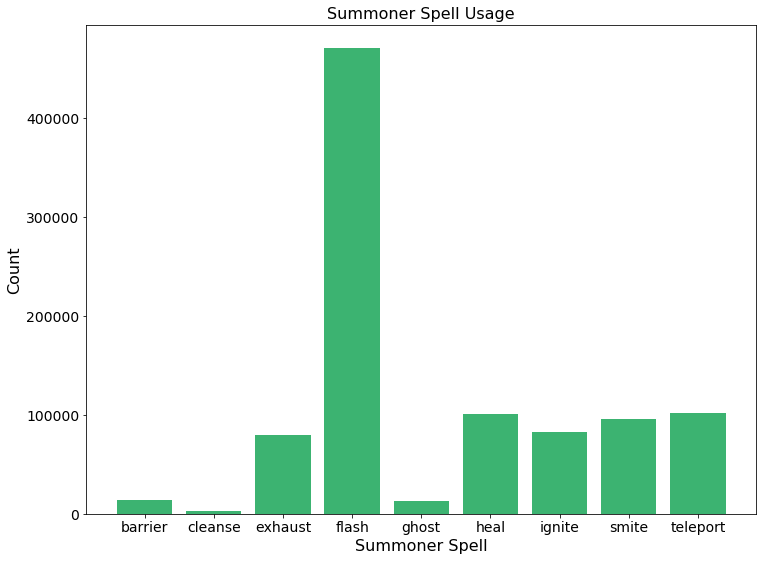

In [15]:
x = np.array(summ_spells_df.index)
y = np.array(summ_spells_df['Count'])
plt.figure(figsize=(12,9))
plt.bar([0,1,2,3,4,5,6,7,8], y, color='mediumseagreen')
plt.xlabel('Summoner Spell', size=16)
plt.ylabel('Count', size=16)
plt.title('Summoner Spell Usage', size=16)
plt.xticks([0,1,2,3,4,5,6,7,8], summ_spells_df.index, size=14)
plt.yticks(size=14);